# Chapter 6: Data Loading, Storage, and File Formats

### Text and binary data loading functions in pandas

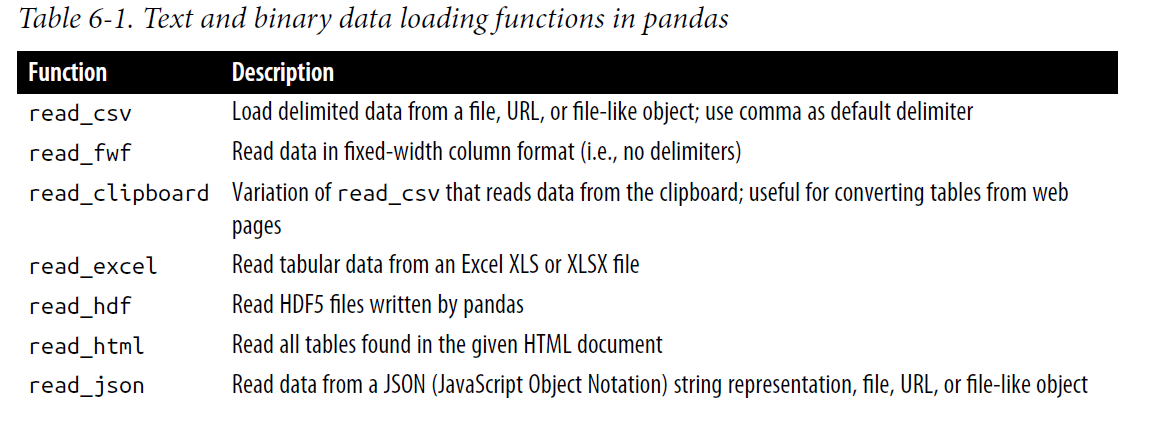

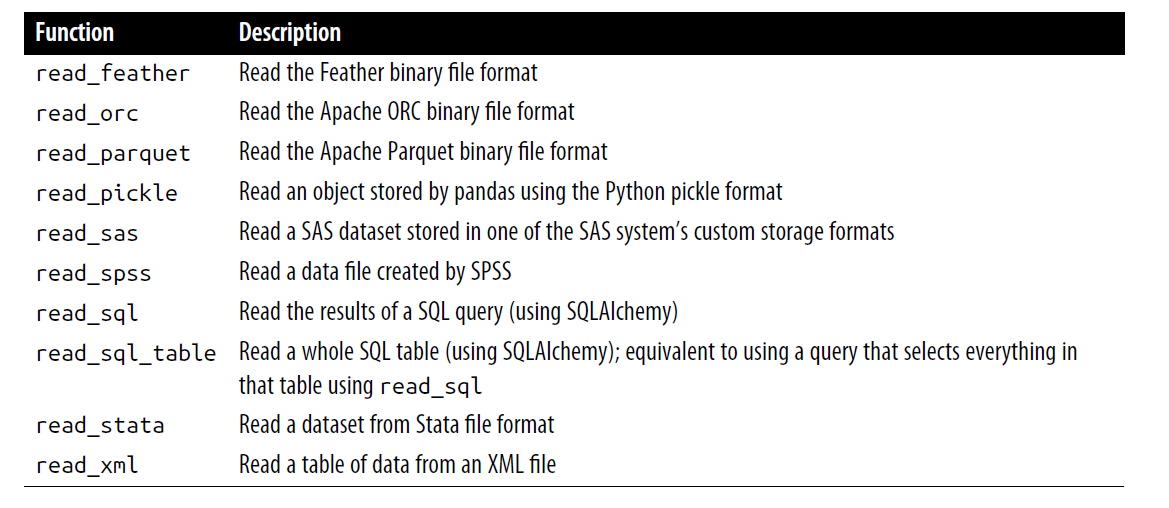

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("example.csv", header=None)
df

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [11]:
df = pd.read_csv("example.csv", names=["a", "b", "c", "d", "message"])
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [13]:
names = ["a", "b", "c", "d", "message"]
df = pd.read_csv("example.csv", names=names, index_col="message")
df

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


### It is possible to skip rows because they're not useful data.

In [ ]:
# hey!
a,b,c,d,message
# another message
# I like pie (not really)
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo
pd.read_csv("above_example.csv", skiprows=[0, 2, 3])

In [ ]:
# Different NA sentinels can be specified for each column in a dictionary:
sentinels = {"message": ["foo", "NA"], "something": ["two"]}
pd.read_csv("example/ex5.csv", na_values=sentinels, keep_default_na=False)
"""
  something a b c d message
0 one       1 2 3 4 NaN
1 Nan       5 6 7 8 world
2 three     9 10 11 12 NaN
"""

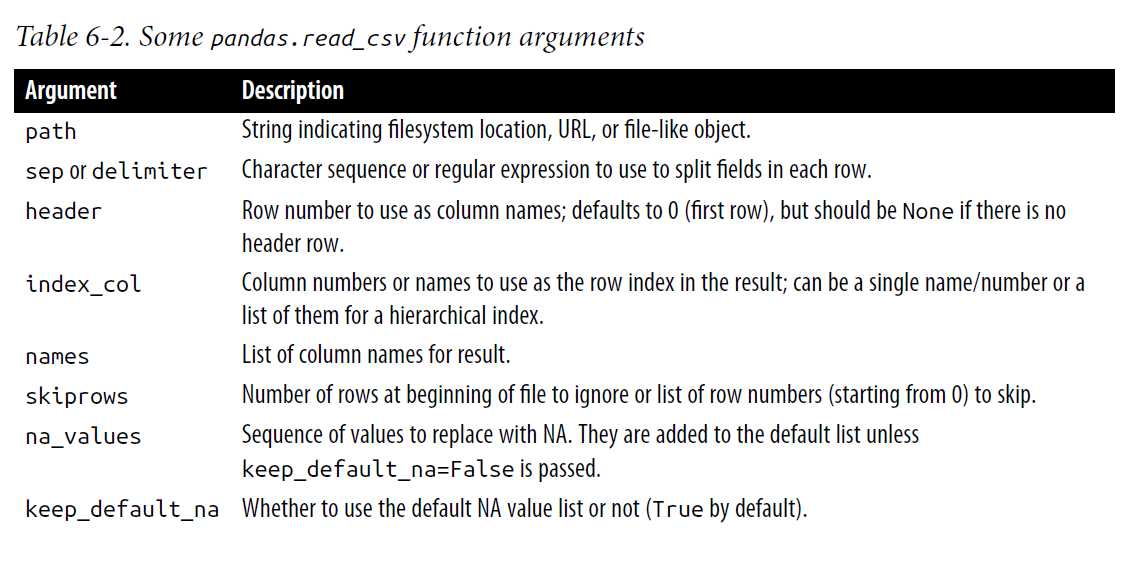

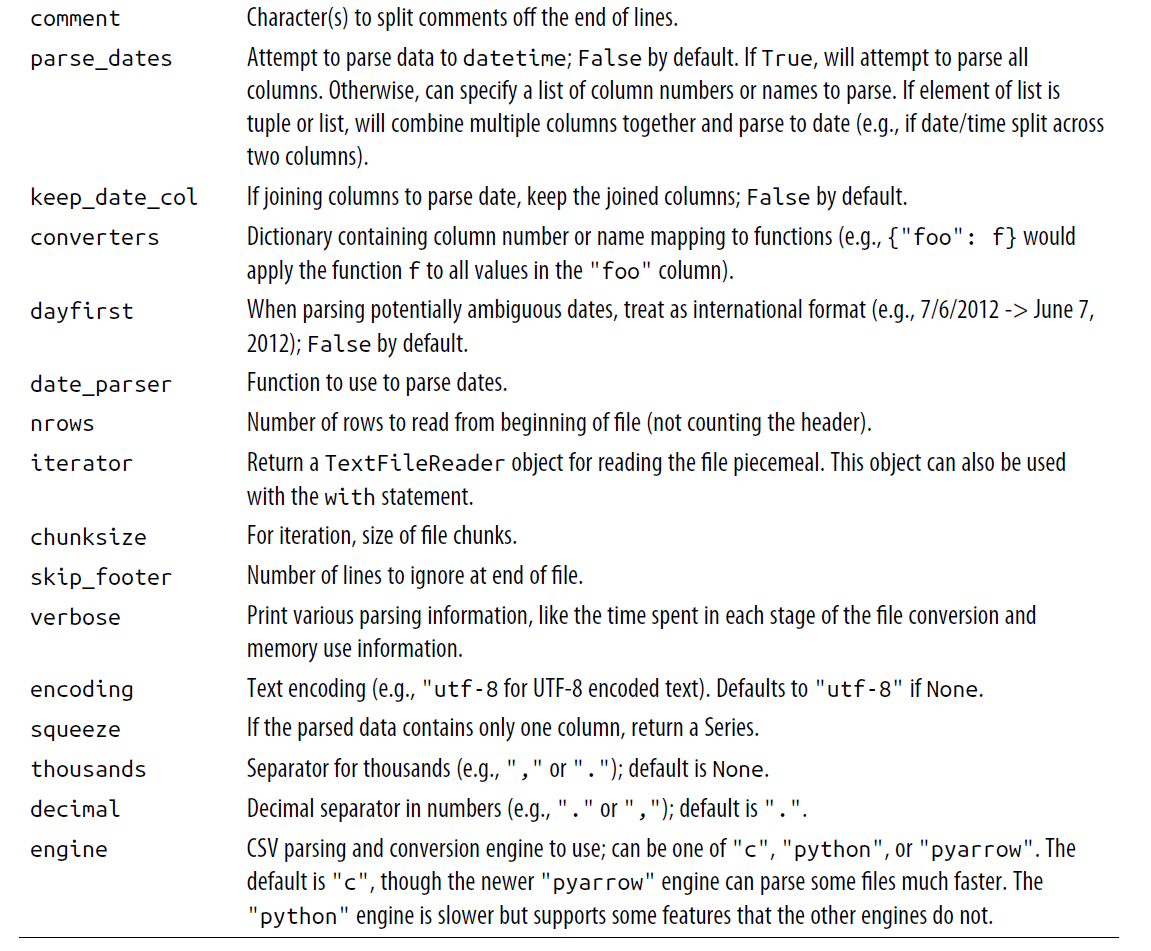

In [16]:
# Reading Text Files in Pieces
pd.options.display.max_rows = 1
df

,a,b,c,d
message,,,,
hello,1,2,3,4


In [2]:
# Sometimes we want to read only a number of rows
pd.options.display.max_rows = 10
df = pd.read_csv("example.csv", nrows=2)
df

,1,2,3,4,hello
0,5,6,7,8,world
1,9,10,11,12,foo


### Json

In [3]:
obj = """
{"name": "Wes",
"cities_lived": ["Akron", "Nashville", "New York", "San Francisco"],
"pet": null,
"siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]},
{"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]
}
"""

In [4]:
import json

In [5]:
result = json.loads(obj)

In [7]:
result

{'name': 'Wes',
 'cities_lived': ['Akron', 'Nashville', 'New York', 'San Francisco'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 34, 'hobbies': ['guitars', 'soccer']},
  {'name': 'Katie', 'age': 42, 'hobbies': ['diving', 'art']}]}

In [8]:
# Dumps will convert Python object back to JSON.
asjson = json.dumps(result)
asjson

'{"name": "Wes", "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"], "pet": null, "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]}, {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]}'

## Interacting with Web APIs

In [2]:
import requests
url = "https://api.github.com/repos/pandas-dev/pandas/issues"
resp = requests.get(url)
resp.raise_for_status() # Good idea to always call raise_for_status after .get to check for HTTP errors.
resp

<Response [200]>

In [4]:
data = resp.json()
data[0]

{'url': 'https://api.github.com/repos/pandas-dev/pandas/issues/58516',
 'repository_url': 'https://api.github.com/repos/pandas-dev/pandas',
 'labels_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/58516/labels{/name}',
 'comments_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/58516/comments',
 'events_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/58516/events',
 'html_url': 'https://github.com/pandas-dev/pandas/issues/58516',
 'id': 2273177473,
 'node_id': 'I_kwDOAA0YD86Hfe-B',
 'number': 58516,
 'title': 'DOC: `pd.concat` description of ordering when passing a mapping is unclear',
 'user': {'login': 'wence-',
  'id': 1126981,
  'node_id': 'MDQ6VXNlcjExMjY5ODE=',
  'avatar_url': 'https://avatars.githubusercontent.com/u/1126981?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/wence-',
  'html_url': 'https://github.com/wence-',
  'followers_url': 'https://api.github.com/users/wence-/followers',
  'following_url': 'https://api.git

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
issues = pd.DataFrame(data, columns=["number", "title", "labels", "state"])
issues

,number,title,labels,state
0,58516,DOC: `pd.concat` description of ordering when ...,"[{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...",open
1,58515,DOC: Enforce Numpy Docstring Validation for pa...,[],open
2,58514,DOC: Enforce Numpy Docstring Validation for pa...,[],open
3,58513,DOC: Enforce Numpy Docstring Validation for pa...,[],open
4,58512,DOC: Enforce Numpy Docstring Validation for pa...,[],open
5,58511,DOC: Enforce Numpy Docstring Validation for pa...,[],open
6,58510,DOC: Enforce Numpy Docstring Validation for pa...,[],open
7,58509,DOC: Enforce Numpy Docstring Validation for pa...,[],open
8,58508,DOC: Enforce Numpy Docstring Validation for pa...,[],open
9,58507,DOC: Enforce Numpy Docstring Validation for pa...,[],open
